In [1]:
import pandas as pd

In [2]:
record=pd.read_csv("train 2.csv")

In [3]:
pd.to_datetime(record["date"])

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]

In [4]:
record["date"]=pd.to_datetime(record["date"])

In [5]:
record

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [6]:
record["date"].dt.to_period("M")

#dt.to_period
#M is for monthly
#Q is for quarterly
#Y is for yearly

0         2013-01
1         2013-01
2         2013-01
3         2013-01
4         2013-01
           ...   
912995    2017-12
912996    2017-12
912997    2017-12
912998    2017-12
912999    2017-12
Name: date, Length: 913000, dtype: period[M]

In [7]:
#create a new column

record["monthly"]= ""

In [8]:
record["monthly"]=record["date"].dt.to_period("M")
record["quarterly"]=record["date"].dt.to_period("Q")
record["yearly"]=record["date"].dt.to_period("Y")



In [9]:
record

,date,store,item,sales,monthly,quarterly,yearly
0,2013-01-01,1,1,13,2013-01,2013Q1,2013
1,2013-01-02,1,1,11,2013-01,2013Q1,2013
2,2013-01-03,1,1,14,2013-01,2013Q1,2013
3,2013-01-04,1,1,13,2013-01,2013Q1,2013
4,2013-01-05,1,1,10,2013-01,2013Q1,2013
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017-12,2017Q4,2017
912996,2017-12-28,10,50,59,2017-12,2017Q4,2017
912997,2017-12-29,10,50,74,2017-12,2017Q4,2017
912998,2017-12-30,10,50,62,2017-12,2017Q4,2017


In [11]:
record.groupby("monthly").sum().reset_index()

#groupby monthly to get sales for each month then we rest the index back to 0
#when we groupby the column becomes an index

,monthly,store,item,sales
0,2013-01,85250,395250,454904
1,2013-02,77000,357000,459417
2,2013-03,85250,395250,617382
3,2013-04,82500,382500,682274
4,2013-05,85250,395250,763242
5,2013-06,82500,382500,795597
6,2013-07,85250,395250,855922
7,2013-08,85250,395250,766761
8,2013-09,82500,382500,689907
9,2013-10,85250,395250,656587


In [12]:
monthly_sales=record.groupby("monthly").sum().reset_index()

In [13]:
monthly_sales.dtypes

monthly    period[M]
store          int64
item           int64
sales          int64
dtype: object

In [15]:
#convert back to datetime
#to_timestamp() is used to convert a period column to datetime

monthly_sales["monthly"].dt.to_timestamp()

0    2013-01-01
1    2013-02-01
2    2013-03-01
3    2013-04-01
4    2013-05-01
5    2013-06-01
6    2013-07-01
7    2013-08-01
8    2013-09-01
9    2013-10-01
10   2013-11-01
11   2013-12-01
12   2014-01-01
13   2014-02-01
14   2014-03-01
15   2014-04-01
16   2014-05-01
17   2014-06-01
18   2014-07-01
19   2014-08-01
20   2014-09-01
21   2014-10-01
22   2014-11-01
23   2014-12-01
24   2015-01-01
25   2015-02-01
26   2015-03-01
27   2015-04-01
28   2015-05-01
29   2015-06-01
30   2015-07-01
31   2015-08-01
32   2015-09-01
33   2015-10-01
34   2015-11-01
35   2015-12-01
36   2016-01-01
37   2016-02-01
38   2016-03-01
39   2016-04-01
40   2016-05-01
41   2016-06-01
42   2016-07-01
43   2016-08-01
44   2016-09-01
45   2016-10-01
46   2016-11-01
47   2016-12-01
48   2017-01-01
49   2017-02-01
50   2017-03-01
51   2017-04-01
52   2017-05-01
53   2017-06-01
54   2017-07-01
55   2017-08-01
56   2017-09-01
57   2017-10-01
58   2017-11-01
59   2017-12-01
Name: monthly, dtype: datetime64[ns]

In [16]:
monthly_sales["monthly"]= monthly_sales["monthly"].dt.to_timestamp()

In [17]:
monthly_sales

,monthly,store,item,sales
0,2013-01-01,85250,395250,454904
1,2013-02-01,77000,357000,459417
2,2013-03-01,85250,395250,617382
3,2013-04-01,82500,382500,682274
4,2013-05-01,85250,395250,763242
5,2013-06-01,82500,382500,795597
6,2013-07-01,85250,395250,855922
7,2013-08-01,85250,395250,766761
8,2013-09-01,82500,382500,689907
9,2013-10-01,85250,395250,656587


In [19]:
from matplotlib import pyplot as plt
import plotly.express as px

In [31]:
px.line(monthly_sales, x="monthly",y="sales")

In [28]:
px.bar(monthly_sales, x="monthly",y="sales",text="sales")

In [32]:
pd.read_excel("fruit product data-3.xlsx", "Sheet1")

,Order ID,Product,Category,Amount,Order Date,State
0,1,Carrots,Vegetables,4270,2012-01-06,Cross River
1,2,Water leaf,Vegetables,8239,2012-01-07,Lagos
2,3,Banana,Fruit,617,2012-01-08,Cross River
3,4,Banana,Fruit,8384,2012-01-10,Abuja
4,5,Beans,Vegetables,2626,2012-01-10,Ogun
...,...,...,...,...,...,...
208,209,Apple,Fruit,1777,2012-12-28,Bauchi
209,210,Beans,Vegetables,680,2012-12-28,Bauchi
210,211,Orange,Fruit,958,2012-12-29,Cross River
211,212,Carrots,Vegetables,2613,2012-12-29,Benue


In [33]:
items=pd.read_excel("fruit product data-3.xlsx", "Sheet1")

In [34]:
items

,Order ID,Product,Category,Amount,Order Date,State
0,1,Carrots,Vegetables,4270,2012-01-06,Cross River
1,2,Water leaf,Vegetables,8239,2012-01-07,Lagos
2,3,Banana,Fruit,617,2012-01-08,Cross River
3,4,Banana,Fruit,8384,2012-01-10,Abuja
4,5,Beans,Vegetables,2626,2012-01-10,Ogun
...,...,...,...,...,...,...
208,209,Apple,Fruit,1777,2012-12-28,Bauchi
209,210,Beans,Vegetables,680,2012-12-28,Bauchi
210,211,Orange,Fruit,958,2012-12-29,Cross River
211,212,Carrots,Vegetables,2613,2012-12-29,Benue


In [35]:
import plotly.express as px

In [37]:
px.bar(items,x="Product",y="Amount")

In [38]:
all_products= items.groupby("Product").sum().reset_index()

In [42]:
px.bar(all_products,x="Product",y="Amount",text="Amount",color="Product", title="Bar chart for Product")

In [44]:
px.bar(all_products,x="Product",y="Amount",text="Amount",color="Product", title="Bar chart for Product", height=400)

In [46]:
px.pie(all_products, values="Amount", names="Product")

In [50]:
piechart=px.pie(all_products, values="Amount", names="Product", title="Pie chart for products")

In [51]:
piechart

In [57]:
piechart.update_traces(textinfo="percent+label")
piechart.update_layout(title_font_size=45,title_font_color="maroon", title_font_family="arial")

#change the values in the segment of the pie chart
#update_traces is used to add more values to the segment in plotly pie

In [58]:
donot=px.pie(all_products, values="Amount", names="Product", title="Donot chart for products", hole=0.5)
donot.update_traces(textinfo="percent,label")
donot.update_layout(title_font_size=45,title_font_color="blue", title_font_family="calibri")

In [61]:
px.scatter(all_products, x="Product",y="Amount",size="Amount",color="Product", height=400, title="scatter chart")

# SEABORN

In [62]:
import seaborn as sns

#it is used for statistcal charts
#it is built on top of matplotlib, it enhances matplotlib

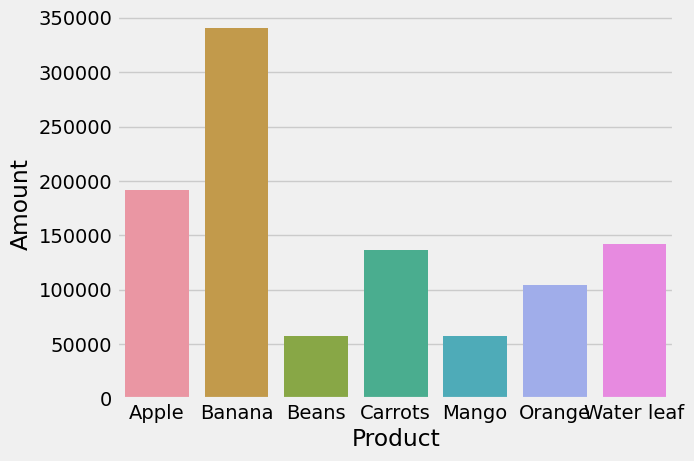

<Figure size 600x400 with 0 Axes>

In [72]:
sns.barplot(x="Product",y="Amount", data=all_products)
plt.figure(figsize=(6,4))
plt.style.use("fivethirtyeight")

In [67]:
plt.style.available

#to see all available backgrounds

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<AxesSubplot: xlabel='Product', ylabel='Amount'>

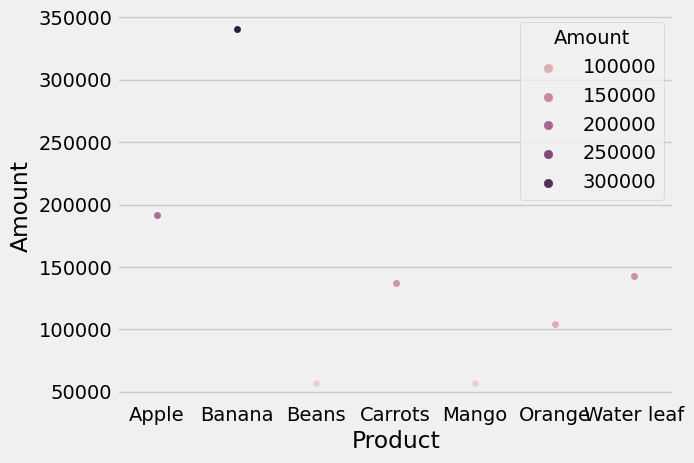

In [73]:
sns.stripplot(x="Product",y="Amount", data=all_products, hue="Amount")

#hue is to show the legend in the seaborn library

In [79]:
#renaming a column in a DataFrame
bat={"egg":"six"}

all_products.rename(columns={"Order ID":"Figures"}, inplace=True)

all_products.rename(index={0:"Start"}, inplace=True)


In [80]:
all_products

,Product,Figures,Amount
Start,Apple,4306,191257
1,Banana,7648,340295
2,Beans,1381,57281
3,Carrots,3174,136945
4,Mango,918,57079
5,Orange,2785,104438
6,Water leaf,2579,142439
